In [1]:
from scipy.optimize import fmin_slsqp
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt
import pandas
import cantera as ct

In [2]:
g = ct.Solution('gri30.xml')

In [3]:
#inputs
P = 1 #atm
R = 8.314 #J/mol

species = ['CH4', 'H2O', 'CO', 'CO2', 'H2'] 
elements = ['O', 'H', 'C']
initial = [2, 3, 0, 0, 0]

In [4]:
#function that returns the stoichiometric amount of elements present in a species

def a(compound, element):
    ci = compound.find(element)
    if ci == -1:
        return 0
    else:
        i =1
        out = ''
        while ci+i<len(compound) and compound[ci +i].isdigit()==True:
            out+=compound[ci+i]
            i+=1
        if i==1:
            return 1
        return out

In [5]:
#function returning the mass balance matrices
def massmatrix(species, elements, initial):
    #initiating the aeq and Aeq matrices
    #no limit to species and elements in the system (just needs to be specified)
    aeq0 = np.zeros([len(elements), len(species)])
    Aeq0 = np.zeros(len(elements))
    #loop to substitute the relative mass balance amounts in the matrix
    
    for k in range(0,len(elements), 1):
        for i in range(0,len(species), 1):
            aeq0[k, i] = a(species[i], elements[k])

    for k in range(0,len(elements), 1):
        Aeq0[k] = np.dot(aeq0[k,:], np.array(initial))
    return aeq0, Aeq0

In [6]:
def ec1(n):
    #(equality constraint, f_eqcons : callable f(x,*args), optional')
    #Returns a 1-D array in which each element must equal 0.0 in a successfully optimized problem.  If f_eqcons is specified, eqcons is ignored.
    aeq0 = massmatrix(species, elements, initial)[0]
    Aeq0 = massmatrix(species, elements, initial)[1]
    return np.dot(aeq0, n) - Aeq0

def ic1(n):
    #inequality constraint, all n>=0
    #(f_ieqcons : callable f(x,*args), optional Returns a 1-D ndarray in which each element must be greater or equal to 0.0 in a successfully optimized problem.If f_ieqcons is specified, ieqcons is ignored)
    return n

In [7]:
def gibbs(T):
    
    #Calculating standard Gibbs of formation at the specified temperature with polynomial fit done in Excel with NIST-JANAF thermochemical data

    Gfo = []
    for i in species:

        data = pandas.read_excel('Assets\Data fGo.xlsx', sheet_name = i)
        x = data['Temperature(K)']
        y = data['fGo(J/mol)']

        def Gfofunction(T, a,b,c,d,e,f, g):
            return a*T**6 + b*T**5 + c*T**4 + d*T**3 + e*T**2 + f*T + g

        val, _ = curve_fit(Gfofunction, x, y)

        Gfo.append(Gfofunction(T, *val))
    Gjo = np.array(Gfo)
    #Function calculating the gibbs free energy of the system as depicted by Equation 1 in the report.
    # No inert added to the system as it doesn't affect the results
    def func(nj):
        nj = np.array(nj)
        ntot = np.sum(nj) #ntot
        G = np.sum(nj * (Gjo / R / T + np.log(nj / ntot))) #G = sum(nj*(Gj/RT+ln(nj/ntot)))
        return G
    
    #Calculating the equilibrium compositions
    X = fmin_slsqp(func, n0, f_eqcons=ec1, f_ieqcons=ic1, iter=10000, acc=1e-12)
    return X

Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -3216776321797.679
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -3216776321797.679
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -3216776321797.679
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -3216776321797.679
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -3216776321797.679
            Iterations: 1
            Function evaluations: 7
      

Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -1079088554550.5376
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -1079088554550.5376
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -1079088554550.5376
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -1079088554550.5376
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -1079088554550.5376
            Iterations: 1
            Function evaluations: 7
 

Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -389641629459.1152
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -389641629459.1152
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -389641629459.1152
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -389641629459.1152
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -389641629459.1152
            Iterations: 1
            Function evaluations: 7
      

Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -417458590210.6589
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -417458590210.6589
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -417458590210.6589
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -417458590210.6589
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -417458590210.6589
            Iterations: 1
            Function evaluations: 7
      

Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -405847187940.0173
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -405847187940.0173
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -405847187940.0173
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -405847187940.0173
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -405847187940.0173
            Iterations: 1
            Function evaluations: 7
      

Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -362034182437.61163
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -362034182437.61163
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -362034182437.61163
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -362034182437.61163
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -362034182437.61163
            Iterations: 1
            Function evaluations: 7
 

Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -369799943304.1799
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -369799943304.1799
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -369799943304.1799
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -369799943304.1799
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Singular matrix C in LSQ subproblem    (Exit mode 6)
            Current function value: -369799943304.1799
            Iterations: 1
            Function evaluations: 7
      

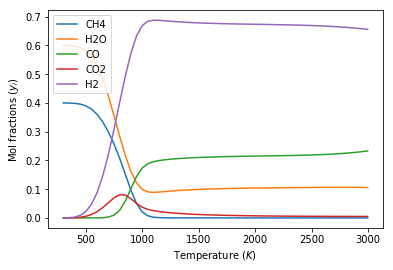

In [8]:
#The chosen temperature range being investigated
Trange = np.arange(298,3000,50)

#Calculating and appending the equilibrium compositions at every temperature increment
data = np.zeros([len(Trange), len(species)])
datax=np.zeros([len(Trange), len(species)])
for T in range(0,len(Trange)):
    x = np.array(initial)/np.sum(initial)
    ntotg = sum(initial)*10**10
    xi = '{}:{}'.format(species[0], x[0])
    for i in range(1,len(x)):
        xi += ','+'{}:{}'.format(species[i], x[i])

    g.TPX = Trange[T],ct.one_atm,xi
    g.equilibrate('TP', solver='gibbs')
    n0 = np.zeros(len(species))
    for n in range(0,len(x)):
        n0[n] = g[species[n]].X *ntotg

    for c in range(0, len(species)):
        data[T, c] = gibbs(Trange[T])[c]

    for x in range(0,len(species)):
        ntot = np.sum(data[T, :])
        datax[T, x] = data[T, x]/ntot

#plotting the mol fractions of the components versus the temperature values spesified
for s in range(0,len(species)):
        plt.plot(Trange, datax[:, s], label= species[s])
plt.xlabel('Temperature ($K$)')
plt.ylabel('Mol fractions ($y_i$)')
plt.legend(loc='best')

